1. Upload the attached home loan dataset

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Homeloan.csv to Homeloan (1).csv


In [ ]:
import pandas as pd   
import io  
df=pd.read_csv(io.BytesIO(uploaded['Homeloan.csv']))   

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


2.Show the features and target in a row-column format using the proper feature names.

2. Preprocessing

As there is categorical and string data, applying One hot encoding

In [ ]:
categorical_name=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

df_encoder= pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_name, drop_first=True, dtype='int8')

df_encoder

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,OHE_Male,OHE_Yes,OHE_1,OHE_2,OHE_3+,OHE_Not Graduate,OHE_Yes,OHE_Semiurban,OHE_Urban
0,LP001002,5849,0.0,NaN,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,1,0,0,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,Y,1,1,0,1,0,0,0,0,1


In [ ]:
X=df_encoder.drop(['Loan_Status'], axis=1)
X

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,OHE_Male,OHE_Yes,OHE_1,OHE_2,OHE_3+,OHE_Not Graduate,OHE_Yes,OHE_Semiurban,OHE_Urban
0,LP001002,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
y=df_encoder['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Applying simple imputer for null values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

X_new= X.drop(['Loan_ID'], axis=1)
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
X_final=pd.DataFrame(imp.fit_transform(X_new))
X_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4106.0,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,8072.0,240.0,253.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Applying standard scaler

In [ ]:
X_final.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler()
print(scaler.fit_transform(X_final))

[[ 0.07299082 -0.55448733  0.         ... -0.39260074 -0.7820157
   1.42814704]
 [-0.13441195 -0.03873155 -0.21927331 ... -0.39260074 -0.7820157
  -0.70020801]
 [-0.39374734 -0.55448733 -0.957641   ...  2.54711697 -0.7820157
   1.42814704]
 ...
 [ 0.43717437 -0.47240418  1.26937121 ... -0.39260074 -0.7820157
   1.42814704]
 [ 0.35706382 -0.55448733  0.4833669  ... -0.39260074 -0.7820157
   1.42814704]
 [-0.13441195 -0.55448733 -0.15972753 ...  2.54711697  1.2787467
  -0.70020801]]


3. Split the data

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X_final, y, test_size=0.20, random_state=0)

4.    Apply ensemble classifier.

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
level0=list()
level0.append(('svr',svm.SVC()))
level0.append(('dt',DecisionTreeClassifier()))

In [ ]:
level1= svm.SVC()

In [ ]:
model_en=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
model_en.fit(Xtrain, ytrain)

StackingClassifier(cv=5,
                   estimators=[('svr', SVC()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [ ]:
y_pred=model_en.predict(Xtest)

In [ ]:
from  sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           N       0.53      0.48      0.51        33
           Y       0.82      0.84      0.83        90

    accuracy                           0.75       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.74      0.75      0.74       123



In [ ]:
categorical_name=['Loan_Status']

y_encoder= pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_name, drop_first=False, dtype='int8')
y_final1=y_encoder['OHE_Y']
y_final2=y_encoder['OHE_N']

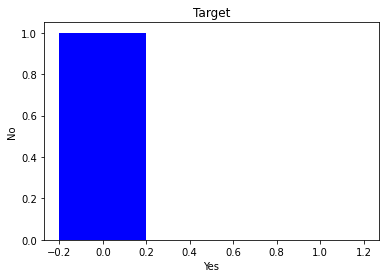

In [ ]:
import matplotlib.pyplot as plt

plt.bar(y_final1, y_final2, color ='blue', width = 0.4)

plt.xlabel('Yes')
plt.ylabel('No')
plt.title('Target')

plt.show()

-> Bubble sort

In [ ]:
x = []
num= int(input("Please Enter the Total Elements : "))
for i in range(num):
  value= int(input("Please enter the %d Item : " %i))
  x.append(value)

for i in range(num-1):
  for j in range(num-i-1):
    if(x[j] > x[j+1]):
      temp = x[j]
      x[j] = x[j+1]
      x[j+1] = temp

print("The Result in Ascending Order : ", x)

Please Enter the Total Elements : 5
Please enter the 0 Item : 6
Please enter the 1 Item : 3
Please enter the 2 Item : 11
Please enter the 3 Item : 9
Please enter the 4 Item : 2
The Result in Ascending Order :  [2, 3, 6, 9, 11]


In [ ]:
values=input("enter : ")


enter : 6,7,8
